In [1]:
#LIBRARIES IMPORT
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#DATASET LOAD & DATA CHECK
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#MISSING VALUES & DUPLICATES
missing=df.isnull().sum()
print(missing)
df.drop_duplicates(inplace=True)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
#DATE COLUMN FORMAT
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [10]:
#CONTENT TYPE COUNT
type_count=df['type'].value_counts()
print("\nThe Count Of Movies & TV Shows On Netflix:",type_count)


The Count Of Movies & TV Shows On Netflix: type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [9]:
#TOP 5 GENRES
top_genres=df['listed_in'].value_counts().head(5)
print("\nThe Top 5 Genres on Netflix:",top_genres)


The Top 5 Genres on Netflix: listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


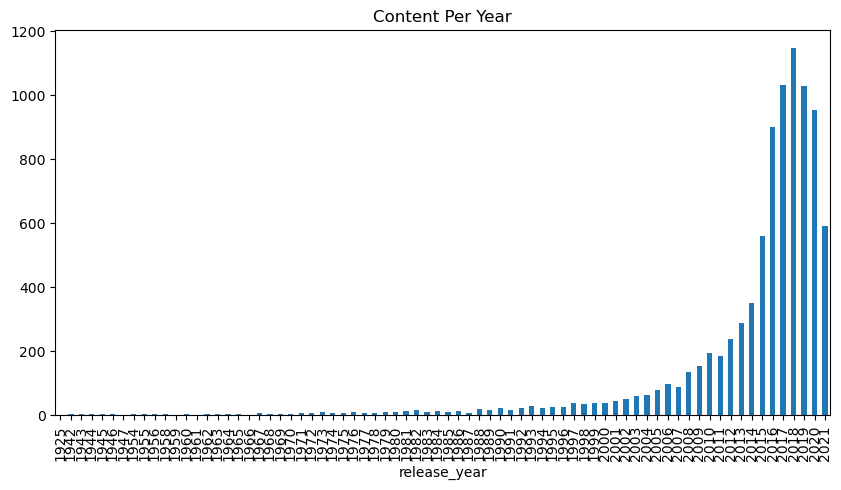

In [11]:
#CONTENT PER YEAR (BAR CHART)
df.groupby('release_year').size().plot(kind='bar',figsize=(10,5),title='Content Per Year')
plt.savefig('content_per_year.png')
plt.show()

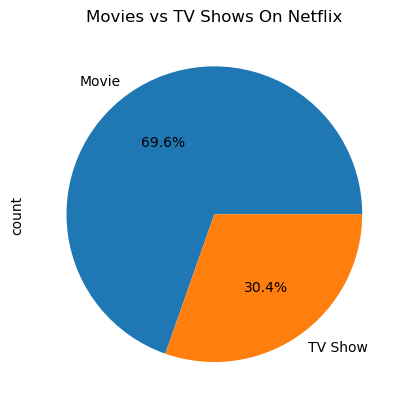

In [12]:
#MOVIES VS TV SHOWS (PIE CHART)
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Movies vs TV Shows On Netflix")
plt.savefig('movie_vs_tvshows.png')
plt.show()